## Project: Investigate a Dataset - [noshow appointments]

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.



### We will try to solve this questions about our data.
    1. which age/gender care more about his health?
    2. If Scholarship effect about attendence?
    3. Handcap is effect about attendence?
    4. If waiting time effect about attendance?


In [67]:
# Import all library that will used
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [68]:
# Read dataset and assign it 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# To see sample of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [69]:
# To show summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
Here we will handling miss values, duplicate values and sure the datatype are right or drop columns that we won't need them

In [70]:
# Check if there's missing values
sum(df.isnull().any())

0

In [71]:
# Check if there are duplicated values
sum(df.duplicated())

0

### we note that patientId have float number should convert to int

## but this operation we don't need it because won't help us in analysis you could skip this and drop it if you wanna

In [72]:
non_int_patientIds = df[~df['PatientId'].apply(lambda x: x.is_integer())]
# we use ~ before condition to return False of them 
non_int_patientIds 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


In [73]:
# check if Petient id when we convert it to int will not be exist in data
for m in non_int_patientIds['PatientId']:
    m = int(m)
    if df.query('PatientId == {}'.format(m)).empty:
        print('it is id',m,'not exist')
    else:
        print('it is id',m,'is exist')

it is id 93779 not exist
it is id 537615 not exist
it is id 141724 not exist
it is id 39217 not exist
it is id 43741 not exist


In [74]:
df['PatientId'] = df['PatientId'].astype(int)

## I will drop PetientId and AppointmentID becuse I don't need them in analysis

In [75]:
df.drop(['PatientId', 'AppointmentID'],axis=1, inplace=True)

## check if there are schedualDay after appointmentDay

In [76]:
sum(df['ScheduledDay'] > df['AppointmentDay'])

38568

## Drop this rows from data

In [77]:
df.drop(df[df['ScheduledDay'] > df['AppointmentDay']].index, inplace=True)

In [78]:
# check again the diff between day
sum(df['ScheduledDay'] > df['AppointmentDay'])

0

## check if there are age less than 0

In [79]:
sum(df['Age'] < 0)

0

## Here I will convert schadualDay and AppointmentDay to datetime

In [80]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
# I removed time in Appointment cause there are zero's only
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71959 entries, 5 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          71959 non-null  object             
 1   ScheduledDay    71959 non-null  datetime64[ns, UTC]
 2   AppointmentDay  71959 non-null  datetime64[ns, UTC]
 3   Age             71959 non-null  int64              
 4   Neighbourhood   71959 non-null  object             
 5   Scholarship     71959 non-null  int64              
 6   Hipertension    71959 non-null  int64              
 7   Diabetes        71959 non-null  int64              
 8   Alcoholism      71959 non-null  int64              
 9   Handcap         71959 non-null  int64              
 10  SMS_received    71959 non-null  int64              
 11  No-show         71959 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 7.1+ MB


In [81]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

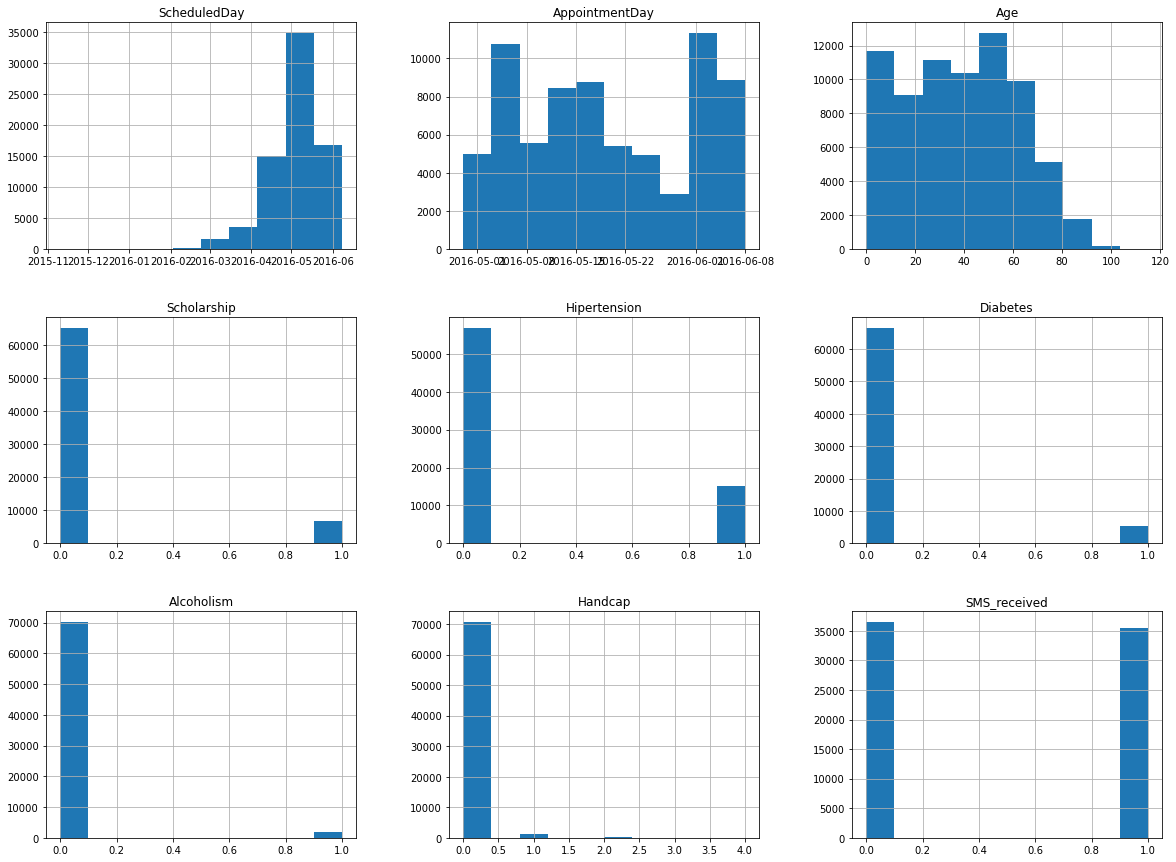

In [82]:
df.hist(figsize=(20, 15));

In [83]:
df.nunique()

Gender                2
ScheduledDay      68666
AppointmentDay       27
Age                 102
Neighbourhood        80
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
SMS_received          2
No-show               2
dtype: int64

In [84]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

## We assign attendance and absent to do operation 

In [85]:
attend = df[df['No-show'] == 'No']
absent = df[df['No-show'] == 'Yes']

## Q1 (which age care more about health) ?

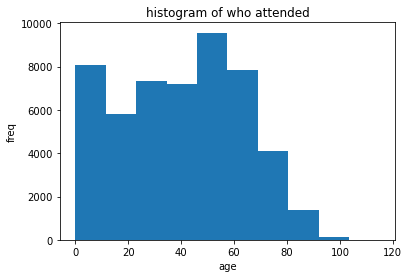

In [86]:
plt.hist(attend['Age'])
plt.title('histogram of who attended')
plt.xlabel('age')
plt.ylabel('freq');

we see that between 50 to 60 are the most attendance then 0 to 10

## Q2 (which gender care more about health ) ?

In [87]:
# function to draw bar
def draw(labels,data,title,xlabel,ylabel):
    
    plt.bar(labels,data.value_counts())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

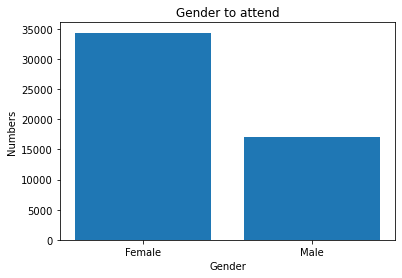

In [88]:
draw(['Female', 'Male'],attend['Gender'],'Gender to attend','Gender','Numbers')

we see here that Females are more care Male's about their self

## Q3 ( if Scholarship effect about attendence) ?

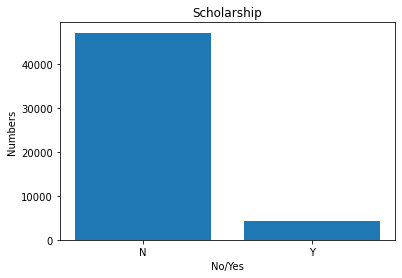

In [89]:
draw(['N', 'Y'],attend['Scholarship'],'Scholarship','No/Yes','Numbers')

we see that most of patients who attend didn't  enroll in Barasilian welfare program

## Q4 ( Handcap is effect about attendence) ?

In [90]:
attend_handcap = attend['Handcap'].value_counts()
attend_handcap

0    50464
1      888
2       78
3        6
4        1
Name: Handcap, dtype: int64

In [91]:
# get total to do operation
tot_handcap = df['Handcap'].value_counts()
tot_handcap

0    70652
1     1185
2      112
3        8
4        2
Name: Handcap, dtype: int64

In [92]:
# to get the percent just dividing group to total and * 100
percent = [] # I define this to store the numbers to use it in drawing
for m in range(len(attend_handcap)):
    print("people who's did not attend",m,'and attend',' =>',100*(attend_handcap[m]/tot_handcap[m]),'%')
    percent.append(100*(attend_handcap[m]/tot_handcap[m]))

people who's did not attend 0 and attend  => 71.42614504897243 %
people who's did not attend 1 and attend  => 74.9367088607595 %
people who's did not attend 2 and attend  => 69.64285714285714 %
people who's did not attend 3 and attend  => 75.0 %
people who's did not attend 4 and attend  => 50.0 %


In [93]:
df['waitedTime'] = df['AppointmentDay'] - df['ScheduledDay']
df['waitedTime'] = pd.to_datetime(df['waitedTime']).dt.day

In [95]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waitedTime
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1 days 11:11:35
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1 days 09:01:49


## Q5 (if waiting time effect about attendance ) ?

In [99]:
df['waitedTime'].unique()

array([ 141789000000000,  118488000000000,  116402000000000, ...,
       3484568000000000, 3487837000000000, 3493744000000000],
      dtype='timedelta64[ns]')

In [100]:
draw = df['waitedTime'].hist()
draw.set_ylabel('Numbers of the  patient')
draw.set_xlabel('waited time per day')
pd.DataFrame(df['waitedTime'].describe())

SyntaxError: invalid syntax (Temp/ipykernel_16532/567712605.py, line 1)

this draw mean that attendance decrease when waiting time increase

In [ ]:
last = df.query('waitedTime > 25')

In [ ]:
result = last['No-show'].value_counts()
result

No     4381
Yes    1999
Name: No-show, dtype: int64

In [ ]:
# check the accuracy of this information
accuracy = result[1] / sum(result)
print('Accuracy = ', accuracy*100,'%')

Accuracy =  31.332288401253916 %


We would note that people who has the waiting time more than 25 days most of them won't be come

In [ ]:
attend.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000
mean,39.965706,0.084336,0.223497,0.078445,0.023349,0.020724,0.499601
std,23.140047,0.277894,0.416592,0.268874,0.151011,0.155761,0.500005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## What if we change the appointment date to give the closest to the elderly

In [ ]:
date = df[df['waitedTime'] < 25]

In [ ]:
res = date['No-show'].value_counts()
res

No     46469
Yes    18198
Name: No-show, dtype: int64

In [ ]:
accuracy = res[0] / sum(res)
print('Accuracy = ',100*accuracy,'%')

Accuracy =  71.85890794377349 %


Great it will increase the probability to attend

<a id='conclusions'></a>
## Conclusions

## Result
    1. Age between 50 to 60 are the most attendance then 0 to 10
    2. Femals Care more than Males about health
    3. Most of people who attend didn't enroll to the Scholarship
    4. look like disability didn't effect about attend to some extent but full diability half of them didn't come
    5. Waiting time effect about attend and when we give closest appointment to elderly the absent was decrease

## limitation
    1. there's data won't help us in analysis like pateintId and appointmentId
    2. about 38 thousand have wrong in appointment day 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0